In [1]:
import qiskit
from qiskit import *
from qiskit import QuantumCircuit, execute, Aer
from qiskit.quantum_info import partial_trace
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector
from math import sqrt, pi
from numpy.random import randint
import numpy as np
from qiskit import IBMQ
from qiskit_ibm_provider import IBMProvider, least_busy

apitoken = 'add822bdd7a0cf338059a6157b26e50155c5bba4fc90826592b20ff80f379a99c8aefe0e52ad3dd304ead3d46edca9af9a9c507bd0096c1c085ce7b369c8e422' #insert api token here

# #for account loading
# IBMProvider.save_account(token=apitoken)
# IBMProvider.load_account()
# provider = IBMProvider()
# backend = least_busy(provider.backends(filters=lambda x:
# x.configuration().n_qubits >= 2
# and not x.configuration().simulator
# and x.status().operational==True))
# print("least busy backend: ", backend)


In [4]:
q = QuantumRegister(5)
c = ClassicalRegister(3)

In [6]:
circuit = QuantumCircuit(q,c)

#prepare
circuit.rx(pi/3, q[0])
circuit.rx(pi/3, q[3])
#prepare EPR pair
circuit.h(q[1])
circuit.cx(q[1], q[2])

#measure with bell state
circuit.cx(q[0], q[1])
circuit.h(q[0])
circuit.measure(q[0], c[0])
circuit.measure(q[1], c[1])

#reconstruct
circuit.z(q[2]).c_if(c[0],1)
circuit.x(q[2]).c_if(c[1],1)

# swap test
circuit.h(q[4])
circuit.cswap(q[4], q[2], q[3])
circuit.h(q[4])
circuit.x(q[4])
circuit.measure(q[4], c[2])
circuit.draw()

┌─────────┐          ┌───┐┌─┐                                        
q1_0: ┤ Rx(π/3) ├───────■──┤ H ├┤M├────────────────────────────────────────
      └──┬───┬──┘     ┌─┴─┐└┬─┬┘└╥┘                                        
q1_1: ───┤ H ├─────■──┤ X ├─┤M├──╫─────────────────────────────────────────
         └───┘   ┌─┴─┐└───┘ └╥┘  ║    ┌───┐       ┌───┐                    
q1_2: ───────────┤ X ├───────╫───╫────┤ Z ├───────┤ X ├─────X──────────────
      ┌─────────┐└───┘       ║   ║    └─╥─┘       └─╥─┘     │              
q1_3: ┤ Rx(π/3) ├────────────╫───╫──────╫───────────╫───────X──────────────
      └──┬───┬──┘            ║   ║      ║           ║       │ ┌───┐┌───┐┌─┐
q1_4: ───┤ H ├───────────────╫───╫──────╫───────────╫───────■─┤ H ├┤ X ├┤M├
         └───┘               ║   ║ ┌────╨─────┐┌────╨─────┐   └───┘└───┘└╥┘
c1: 3/═══════════════════════╩═══╩═╡ c1_0=0x1 ╞╡ c1_1=0x1 ╞══════════════╩═
                             1   0 └──────────┘└──────────┘              2

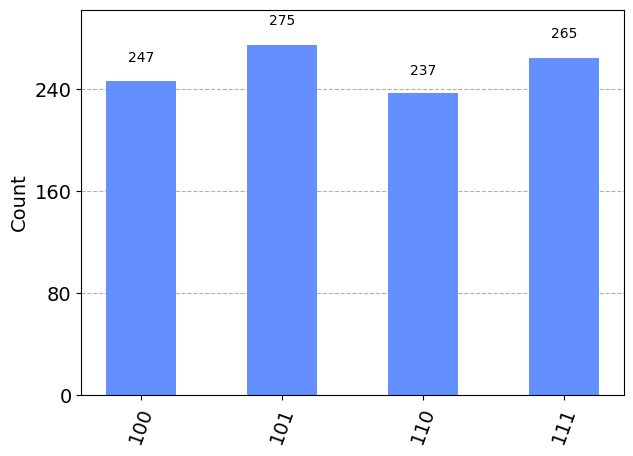

In [7]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)